In [10]:
import pandas as pd 
import numpy as no
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv('/content/User_Data.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [14]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [15]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
new_gender=data['Gender'].map({'Male':1,'Female':2})
new_gender

0      1
1      1
2      2
3      2
4      1
      ..
395    2
396    1
397    2
398    1
399    2
Name: Gender, Length: 400, dtype: int64

In [17]:
data["Gender"]=new_gender
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [18]:
x=data.iloc[:,1:4]
y=data.iloc[:,4]

In [19]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000
...,...,...,...
395,2,46,41000
396,1,51,23000
397,2,50,20000
398,1,36,33000


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)


In [22]:
len(xtrain)

300

In [23]:
len(ytrain)

300

In [24]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(xtrain)    
x_test= st_x.transform(xtest)   

In [26]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier
Tree_Model=DecisionTreeClassifier(criterion="entropy",random_state=0)

In [27]:
Tree_Model.fit(x_train,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
ypred=Tree_Model.predict(x_test)

In [ ]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [29]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(ytest, ypred)

In [30]:
cm

array([[63,  5],
       [ 3, 29]])

In [31]:
from sklearn.metrics import accuracy_score
accu = accuracy_score(ytest,ypred)
accu

0.92

In [34]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


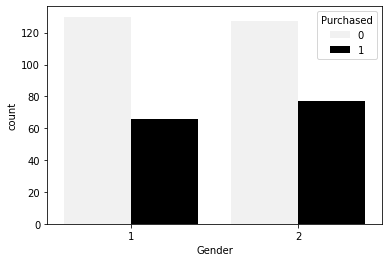

In [35]:
sns.countplot(data['Gender'],hue=data['Purchased'],color='black')

In [36]:
from sklearn import tree

In [37]:
Decision_Tree= tree.export_graphviz(Tree_Model,out_file='tree.dot', feature_names=xtrain.columns,max_depth=2, filled=True)

In [38]:
!dot -Tpng tree.dot -o tree.png

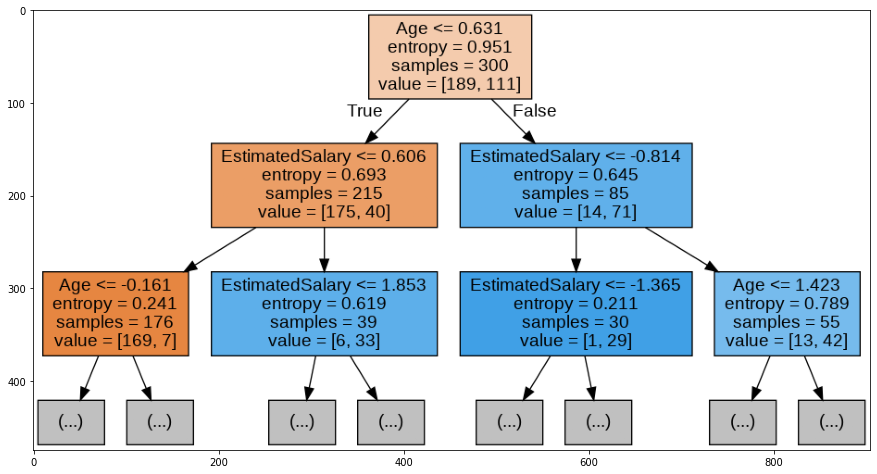

In [39]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)